# Census Income Data Set

Analysing the census income dataset and predicting the income which is grater than 50k or lesser than 50k

Importing the required libraries as shown below

Data Analysing 

Data Visualization

Electronic design automation (EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [91]:
da=pd.read_csv('census.csv')
da

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Dataset Details

y =>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.    

In [92]:
# Replace the ? in the dataset and replacing it with the NAN 
# Later droping all the NaN value containing rows 

data=da.replace({'?':np.nan}).dropna()

In [93]:
#Head of the data i,e is first 20 rows od the dataset
data.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [94]:
#Finding the null values and data types of the datset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [95]:
#these are the dataset columns

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [96]:
# Renaming the columns for better understanding of the data

data=data.rename(columns={'education.num':'education_num','marital.status':'marital_status','capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'})

In [97]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [98]:
#Finding the null value in the dataset  

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [140]:
# Finding the un-unique values in each and every column

data.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

# Data Visualization

Univariate visualization

36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64


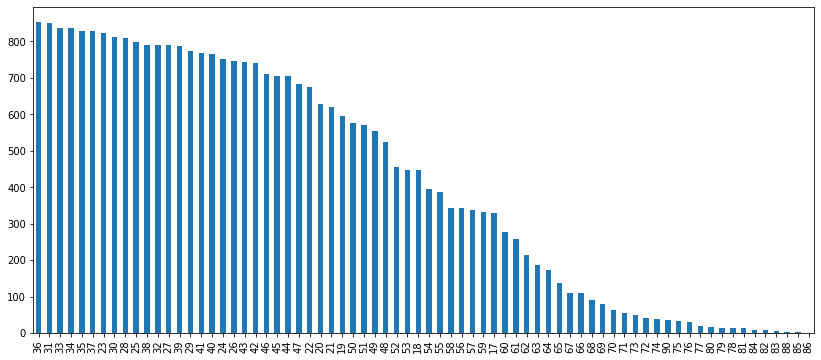

In [100]:
plt.figure(figsize=(14,6))
print(data['age'].value_counts())
data['age'].value_counts().plot.bar()

Top 5 people are in the range of age 31 to 35

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64


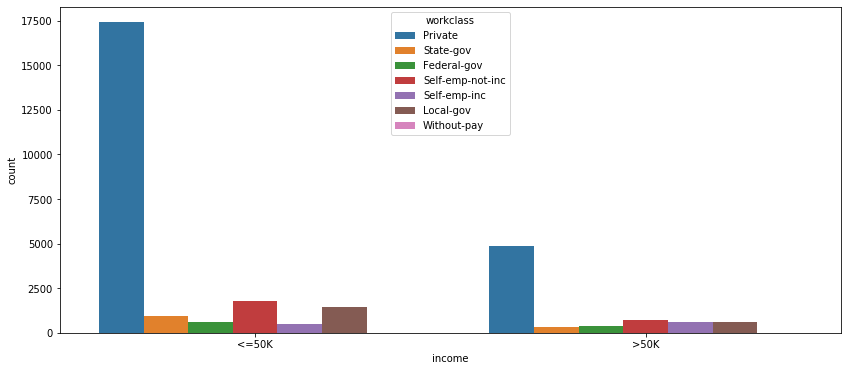

In [101]:
plt.figure(figsize=(14,6))
print(data['workclass'].value_counts())
sb.countplot(x=data['income'],hue=data['workclass'])

In this dataset most of the people belong to private workclass

Private             22286,
Self-emp-not-inc     2499,
Local-gov            2067,
State-gov            1279,
Self-emp-inc         1074,
Federal-gov           943,
Without-pay            14

Separation of workclass based on income as shown in above graph 

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64


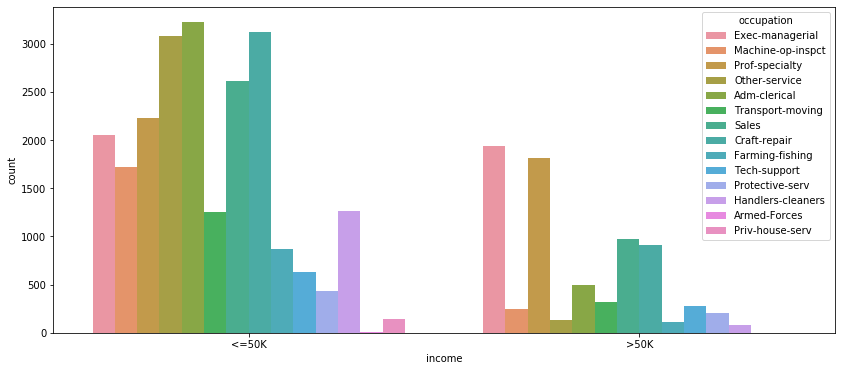

In [102]:
plt.figure(figsize=(14,6))
print(data['occupation'].value_counts())
sb.countplot(x=data['income'],hue=data['occupation'])

occupation analysis which gives the details of occupation of the people 

graph gives you the details of income and occupation

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education_num, dtype: int64


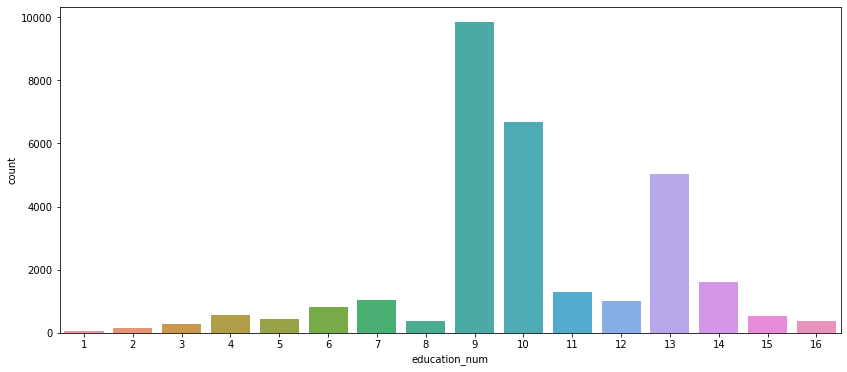

In [103]:
plt.figure(figsize=(14,6))
print(data['education_num'].value_counts())
sb.countplot(data['education_num'])

Male      20380
Female     9782
Name: sex, dtype: int64


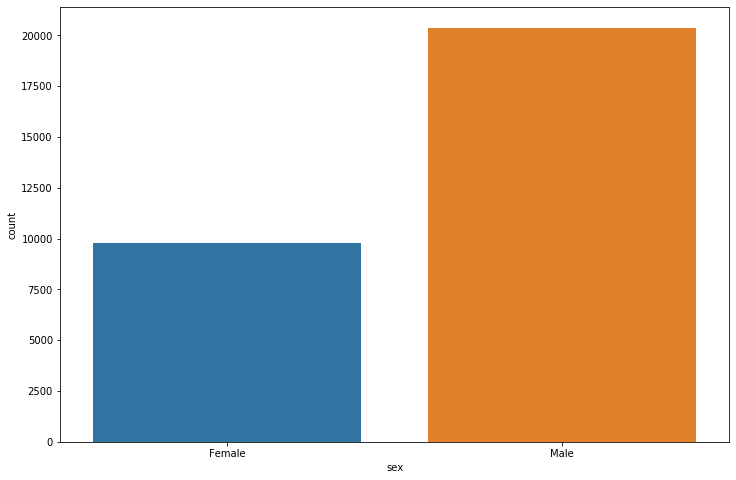

In [104]:
plt.figure(figsize=(12,8))
print(data['sex'].value_counts())
sb.countplot(data['sex'])

There are more number of men comapared to female 

<=50K    22654
>50K      7508
Name: income, dtype: int64


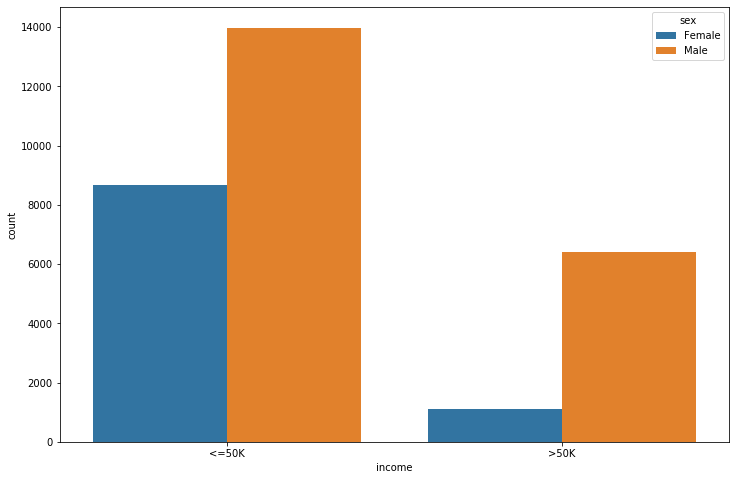

In [105]:
plt.figure(figsize=(12,8))
print(data['income'].value_counts())
sb.countplot(x=data['income'],hue=data['sex'])

In both less than 50k and greater than 50k men are leading the graph

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64


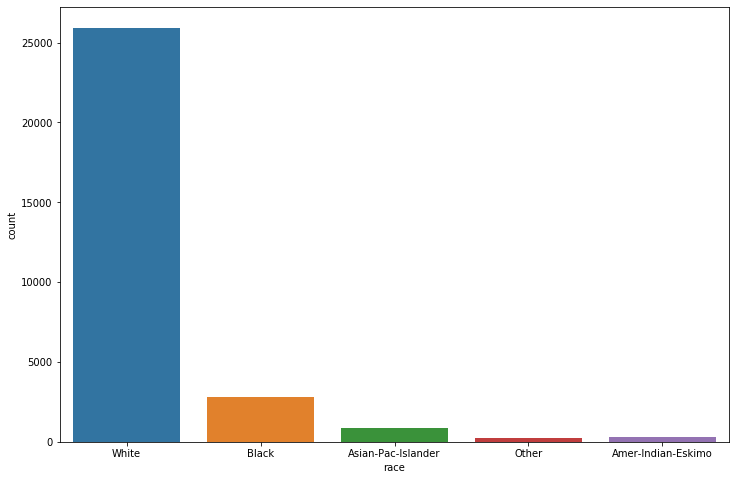

In [106]:
plt.figure(figsize=(12,8))
print(data['race'].value_counts())
sb.countplot(x=data['race'])

Different race of people

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231

here white people are in huge number 

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

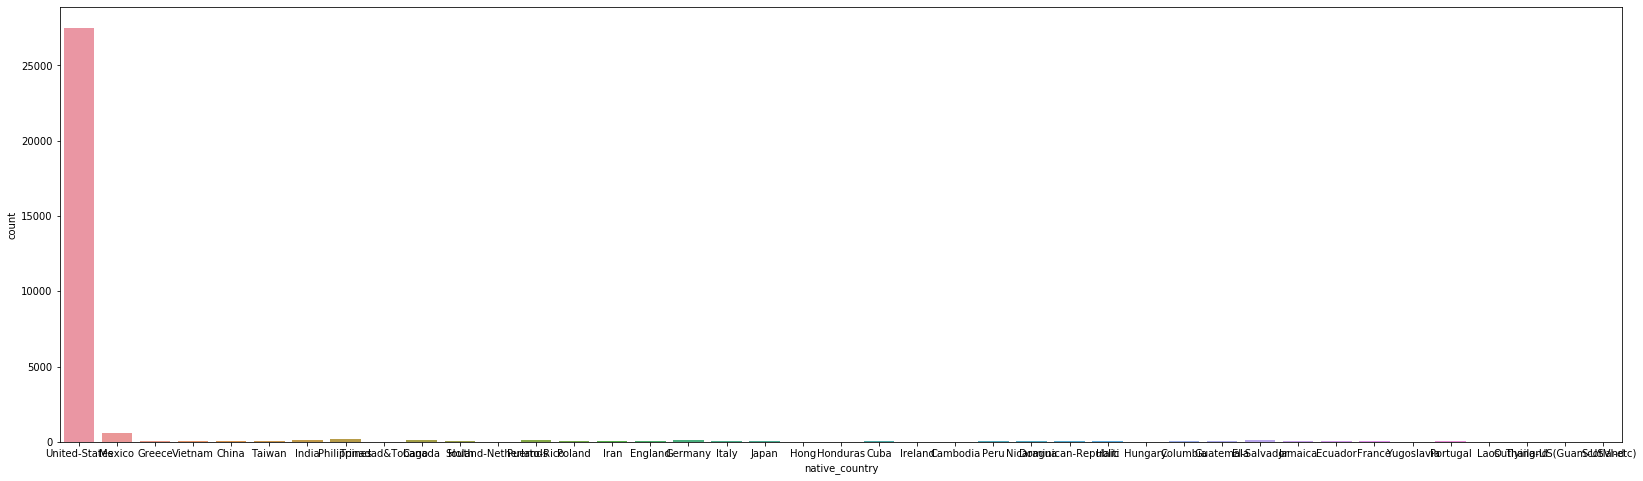

In [107]:
plt.figure(figsize=(28,8))
print(data['native_country'].value_counts())
sb.countplot(x=data['native_country'])

Most of the people are from United-States 

In [108]:
# find out which column is object 
data.dtypes == object

age               False
workclass          True
fnlwgt            False
education          True
education_num     False
marital_status     True
occupation         True
relationship       True
race               True
sex                True
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
income             True
dtype: bool

# Electronic design automation (EDA)

In [109]:
col=['workclass','education','marital_status','occupation','relationship','sex','race','native_country','income']

In [110]:
# LabelEncoder is used to convert categorical data into numerical data

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0


In [111]:
data.head(60)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,5,88638,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
10,45,2,172274,10,16,0,9,4,2,0,0,3004,35,38,1
11,38,4,164526,14,15,4,9,1,4,1,0,2824,45,38,1
12,52,2,129177,9,13,6,7,1,4,0,0,2824,20,38,1


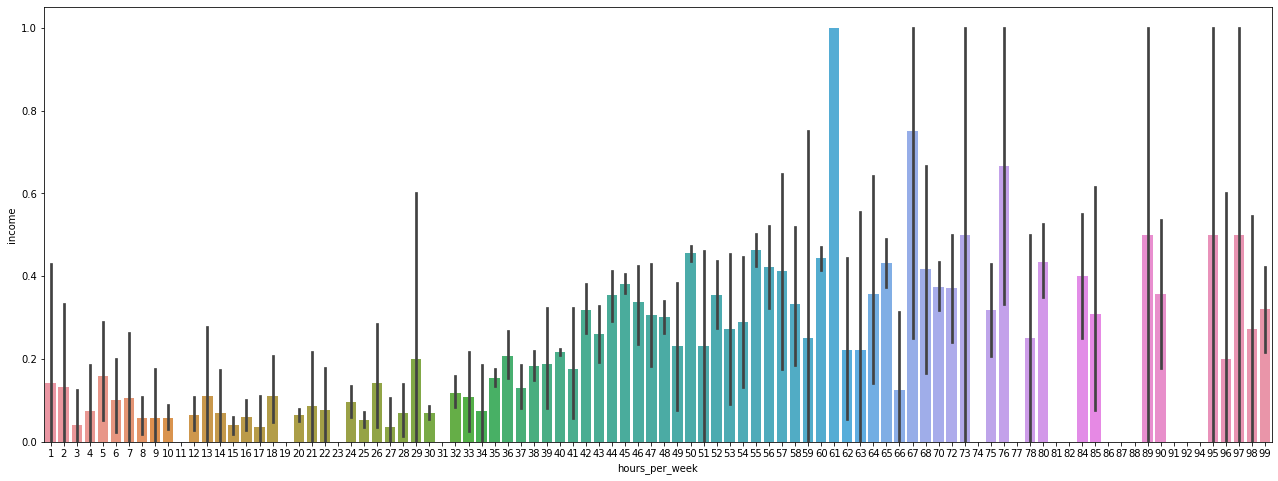

In [112]:
#Anaylsing the with hours_per_week and income with the help of graph

plt.figure(figsize=(22,8))
sb.barplot(x='hours_per_week',y='income',data=data)

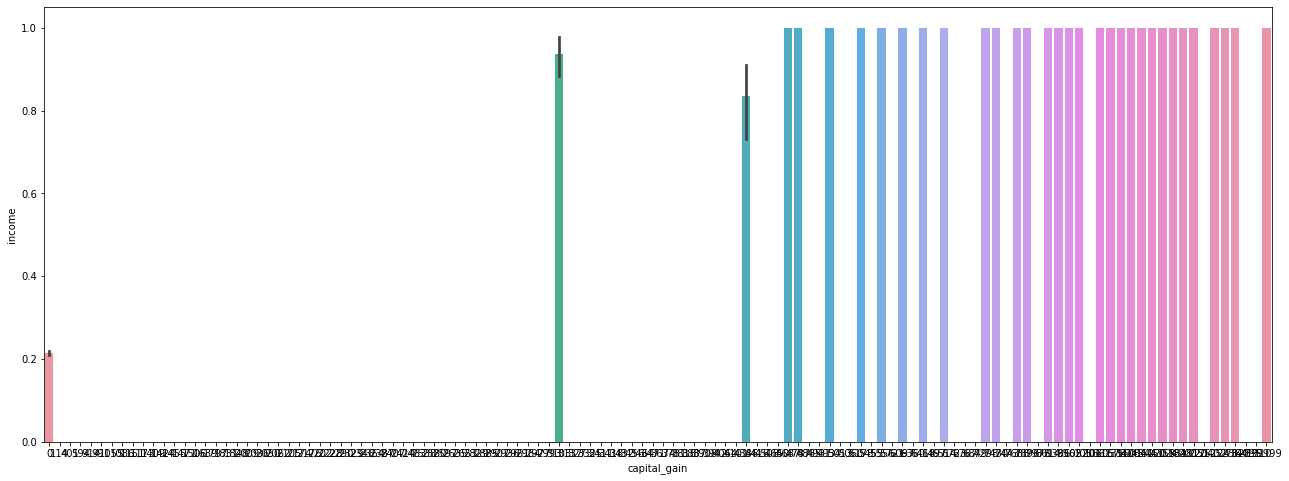

In [113]:
#Anaylsing the with capital_gain and income with the help of graph

plt.figure(figsize=(22,8))
sb.barplot(x='capital_gain',y='income',data=data)

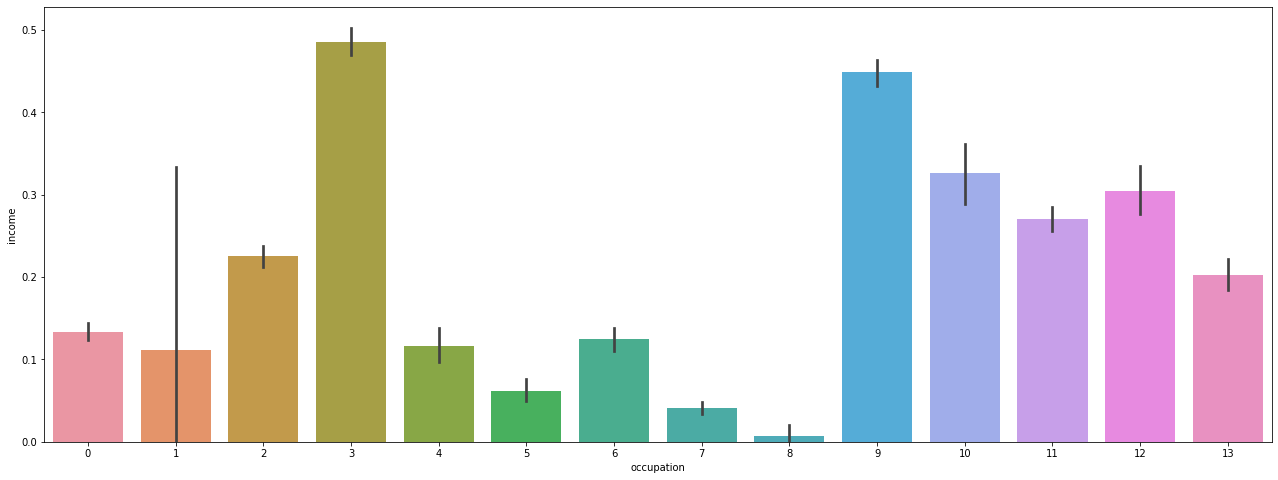

In [114]:
plt.figure(figsize=(22,8))
sb.barplot(x='occupation',y='income',data=data)

In [115]:
# the Correlation between the different variables

data.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education_num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital_status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


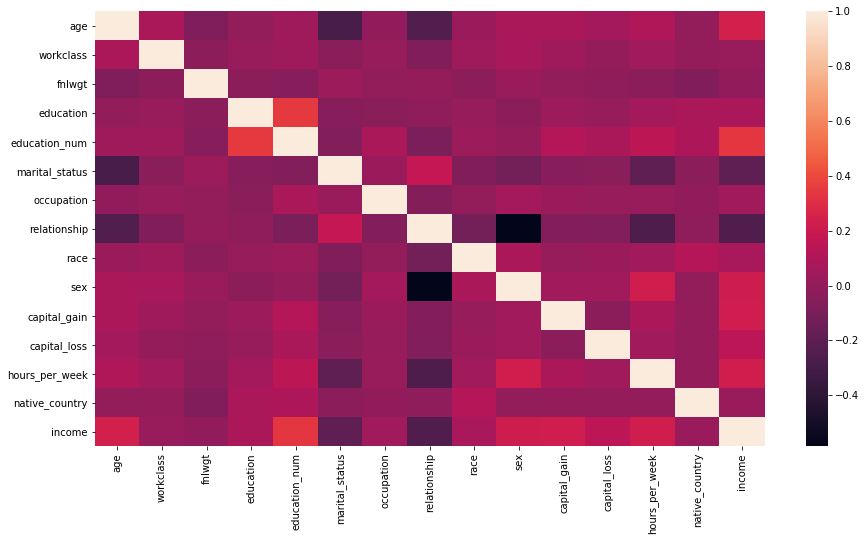

In [116]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(15,8))
sb.heatmap(data.corr())

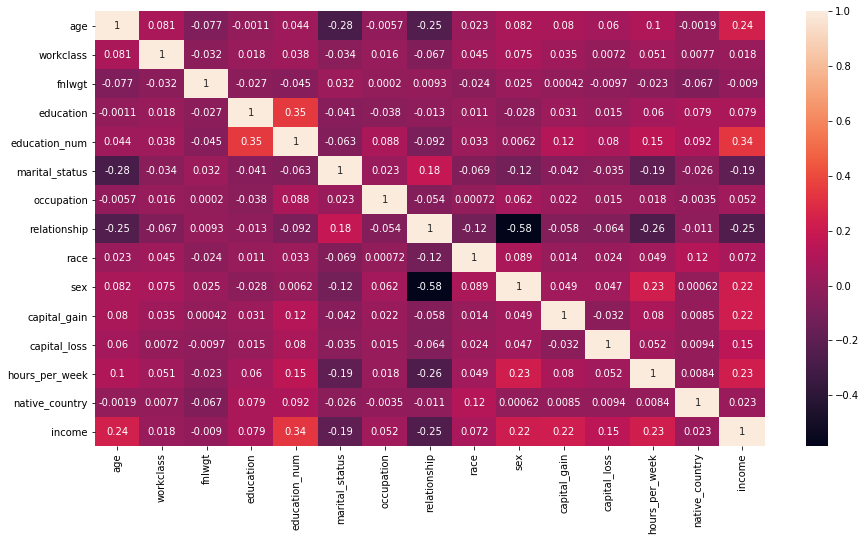

In [117]:
plt.figure(figsize=(15,8))
sb.heatmap(data.corr(),annot=True)

<Figure size 1008x1152 with 0 Axes>

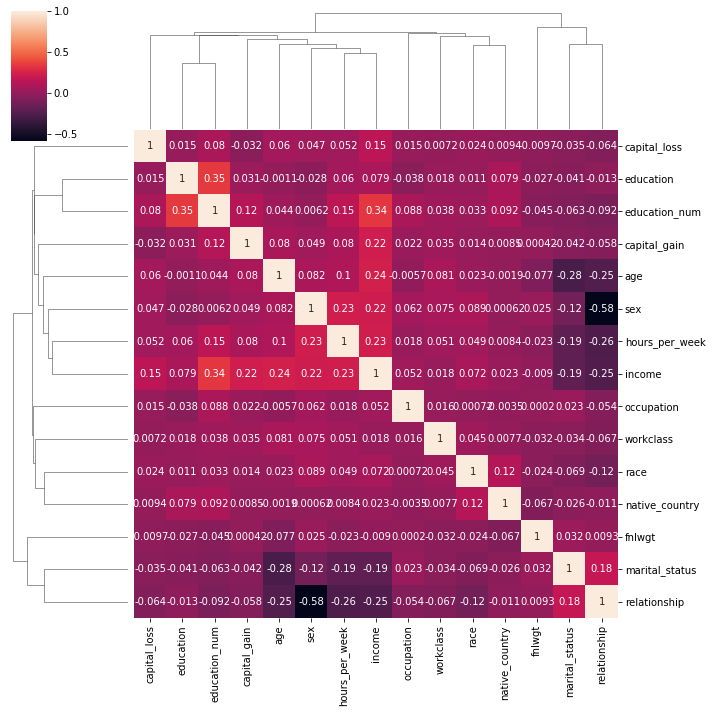

In [118]:
# This clustermap shows the Correlation between the different variables

plt.figure(figsize=(14,16))
sb.clustermap(data.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

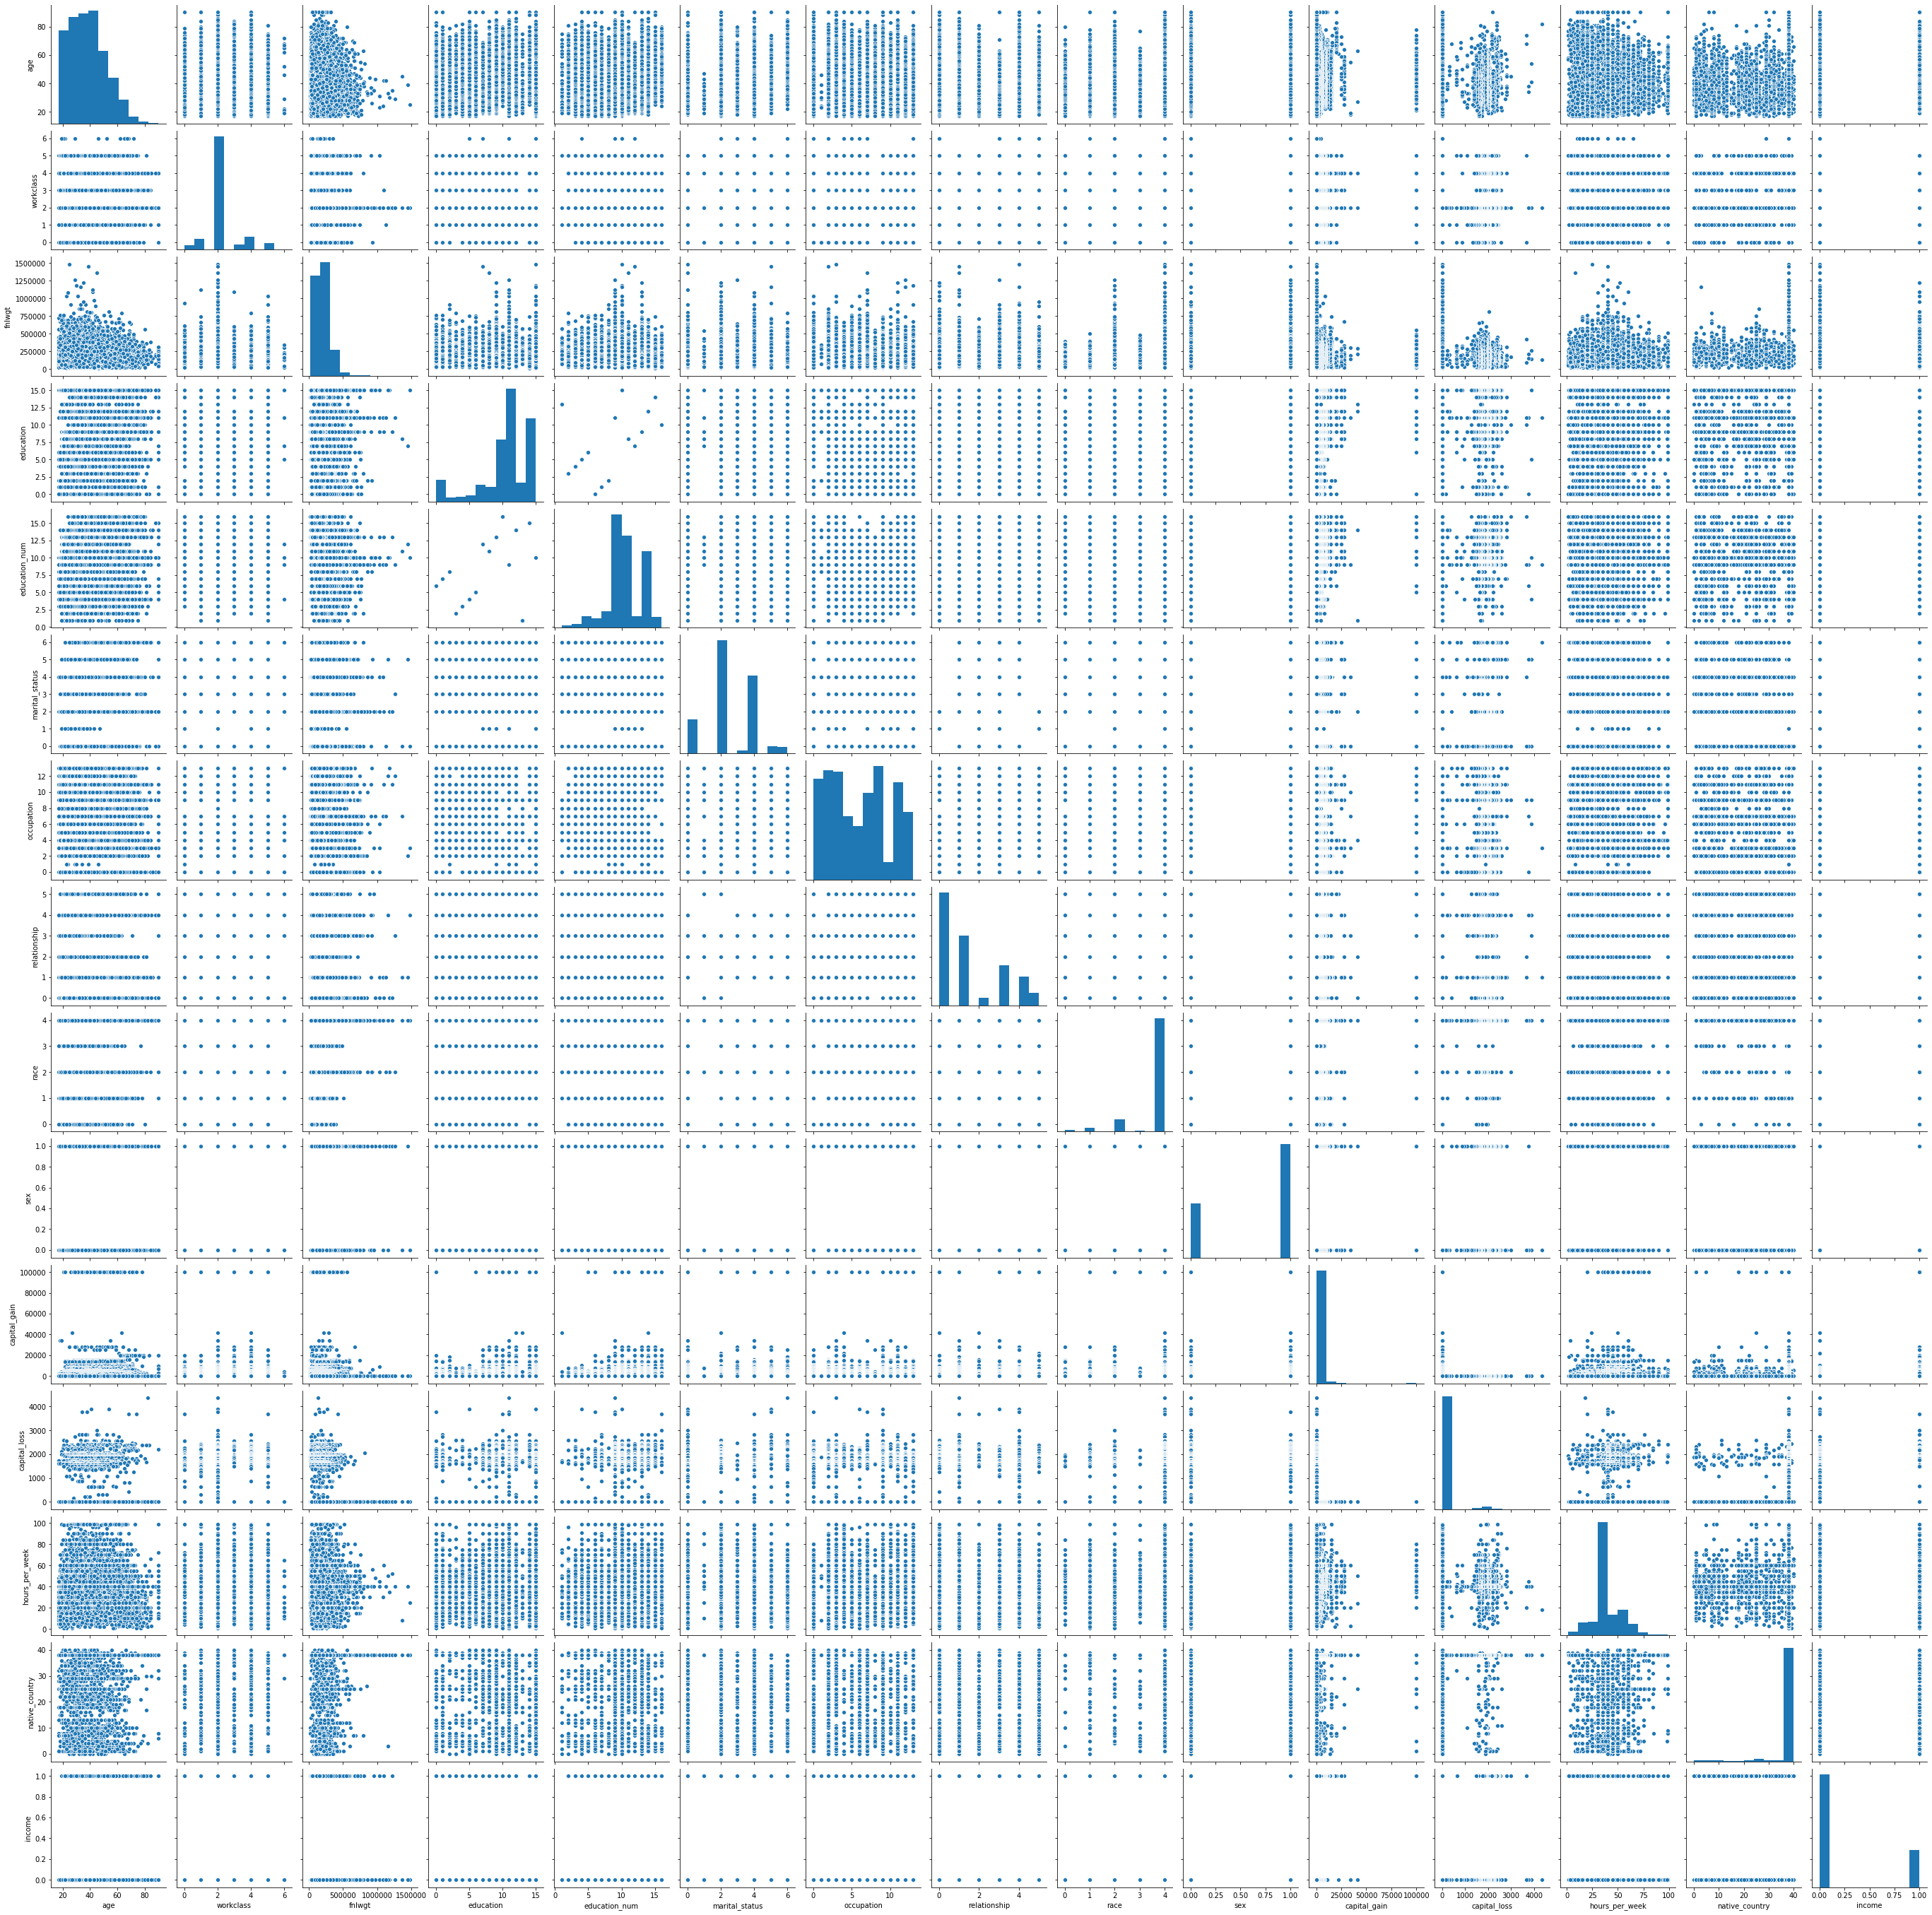

In [119]:
sb.pairplot(data)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [120]:
x=data.drop(['income'],axis=1)
y=data['income']

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=60)

In [122]:
#working on LogisticRegression 
#training and testing data using LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [123]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred)*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred))

Accuracy score:
78.22963863410321
----------------------------------------
Confusion Matrix:
[[6398  343]
 [1627  681]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      6741
           1       0.67      0.30      0.41      2308

    accuracy                           0.78      9049
   macro avg       0.73      0.62      0.64      9049
weighted avg       0.76      0.78      0.75      9049



cross valiadtion and cross prediction

In [125]:
#cross valiadtion
score=cross_val_score(lr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(lr,x,y,cv=5)
print(predscore)

mean score : 0.7534308155278595
STD score: 0.029195167940208072

[0 0 0 ... 0 0 0]


In [126]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [127]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
84.52867720190076
----------------------------------------
Confusion Matrix:
[[6241  500]
 [ 900 1408]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6741
           1       0.74      0.61      0.67      2308

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.84      9049



In [128]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 0.19675544259034147
MSE : 0.1069056249309316
RMSE : 0.32696425635064696


cross valiadtion and cross prediction

In [129]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.28822871776454145
STD score: 0.01361904734942522

cross prediction [0.04 0.01 0.01 ... 0.21 0.   0.  ]


In [130]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [131]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
80.82661067521273
----------------------------------------
Confusion Matrix:
[[5879  862]
 [ 873 1435]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6741
           1       0.62      0.62      0.62      2308

    accuracy                           0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



In [132]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 0.19173389324787268
MSE : 0.19173389324787268
RMSE : 0.4378742893204312


cross valiadtion and cross prediction

In [133]:
#cross valiadtion
score=cross_val_score(dtr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -0.2751590898321049
STD score: 0.04488642282438825

cross prediction [0.02 0.   0.   ... 0.27 0.   0.  ]


In [134]:
#working on SVC 
#training and testing data using SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [135]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
78.36224997237264
----------------------------------------
Confusion Matrix:
[[6736    5]
 [1953  355]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6741
           1       0.99      0.15      0.27      2308

    accuracy                           0.78      9049
   macro avg       0.88      0.58      0.57      9049
weighted avg       0.83      0.78      0.72      9049



In [136]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 0.21637750027627362
MSE : 0.21637750027627362
RMSE : 0.46516394988893284


cross valiadtion and cross prediction

In [137]:
#cross valiadtion
score=cross_val_score(svc,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(svc,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.7770679037178807
STD score: 0.04167693106388921

cross prediction [0 0 0 ... 0 0 0]


GridSearchCV for the best model

In [138]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

best score : 0.45920483562668213
best params : {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [139]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'census.pkl')

['census.pkl']

# conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Electronic design automation  and Data Preprocessing is used to prepare the data for modeling 

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc 

Saving the best model with joblib